In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
def params_label(params):
    
    label = '';
    
    for k in params.keys():
        
        v = params[k]
        
        if type(v) == dict:
            label += params_label(v)
        else:

            abb = {
                'optimize_segments':'sopt',
                'prm_build_time': 't_prm',
                'samples_per_goal':'k',
                'timePerAppleSeconds':'tpa',
                'apply_shellstate_optimization':'shopt',
                'useImprovisedSampler':'imp',
                'tryLuckyShots':'l',
                'useCostConvergence':'conv',
                'GreatCircle':'GC'
            }
            
            k = abb.get(k,k)
            

            if type(v) == bool:
                if v:
                    label += '({})'.format(k)
            elif type(v) == str:
                label += '({})'.format(abb.get(v,v))
            else:
                label += '({}:{})'.format(k,v)
    
    return label

In [3]:
with open('full_experiment.json') as f:
    data = json.load(f)
    
track_stats = ['goals_visited', 'final_path_length','run_time']

run_stats = [
    {
        'goals_visited': run['goals_visited'],
        'final_path_length': run['final_path_length'],
        'run_time': run['run_time'],
        'start_state': run['start_state'],
        'planner': run['planner_name'],
        'label': params_label(run['planner_params'])
    }
    for run in data
]

run_stats = pd.DataFrame(run_stats)

In [4]:
agged = run_stats.groupby(
    ['planner','label']
)[['goals_visited','final_path_length','run_time']].agg(['mean','sem'])

In [5]:
agged

goals_visited  \
                                                                  mean   
planner          label                                                   
Multigoal PRM*   (sopt)(t_prm:1.0)(k:2)                          129.8   
                 (sopt)(t_prm:1.0)(k:3)                          143.6   
                 (sopt)(t_prm:1.0)(k:4)                          150.6   
                 (sopt)(t_prm:1.0)(k:5)                          159.0   
                 (sopt)(t_prm:1.0)(k:6)                          161.4   
...                                                                ...   
ShellPathPlanner (shopt)(GC)(PRM)(tpa:1.0)(imp)                  163.8   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)                    163.4   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)              163.8   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)(imp)         163.6   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(imp)               162.6   

                                                                    \
                                                               sem   
planner          label                                               
Multigoal PRM*   (sopt)(t_prm:1.0)(k:2)                   3.852272   
                 (sopt)(t_prm:1.0)(k:3)                   2.803569   
                 (sopt)(t_prm:1.0)(k:4)                   3.155947   
                 (sopt)(t_prm:1.0)(k:5)                   1.224745   
                 (sopt)(t_prm:1.0)(k:6)                   0.509902   
...                                                            ...   
ShellPathPlanner (shopt)(GC)(PRM)(tpa:1.0)(imp)           0.374166   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)             0.400000   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)       0.489898   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)(imp)  0.244949   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(imp)        0.244949   

                                                         final_path_length  \
                                                                      mean   
planner          label                                                       
Multigoal PRM*   (sopt)(t_prm:1.0)(k:2)                         665.273567   
                 (sopt)(t_prm:1.0)(k:3)                         646.262191   
                 (sopt)(t_prm:1.0)(k:4)                         655.156641   
                 (sopt)(t_prm:1.0)(k:5)                         673.467136   
                 (sopt)(t_prm:1.0)(k:6)                         630.243765   
...                                                                    ...   
ShellPathPlanner (shopt)(GC)(PRM)(tpa:1.0)(imp)                 583.066968   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)                   401.545473   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)             540.300463   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)(imp)        478.929324   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(imp)              338.530684   

                                                                     \
                                                                sem   
planner          label                                                
Multigoal PRM*   (sopt)(t_prm:1.0)(k:2)                   16.577124   
                 (sopt)(t_prm:1.0)(k:3)                    9.675559   
                 (sopt)(t_prm:1.0)(k:4)                   11.858425   
                 (sopt)(t_prm:1.0)(k:5)                   12.190069   
                 (sopt)(t_prm:1.0)(k:6)                    8.389119   
...                                                             ...   
ShellPathPlanner (shopt)(GC)(PRM)(tpa:1.0)(imp)            5.167688   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)              6.290875   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)        9.340534   
                 (shopt)(GC)(PRM)(tpa:1.0)(l)(conv)(imp)   6.356357   
                 (shopt

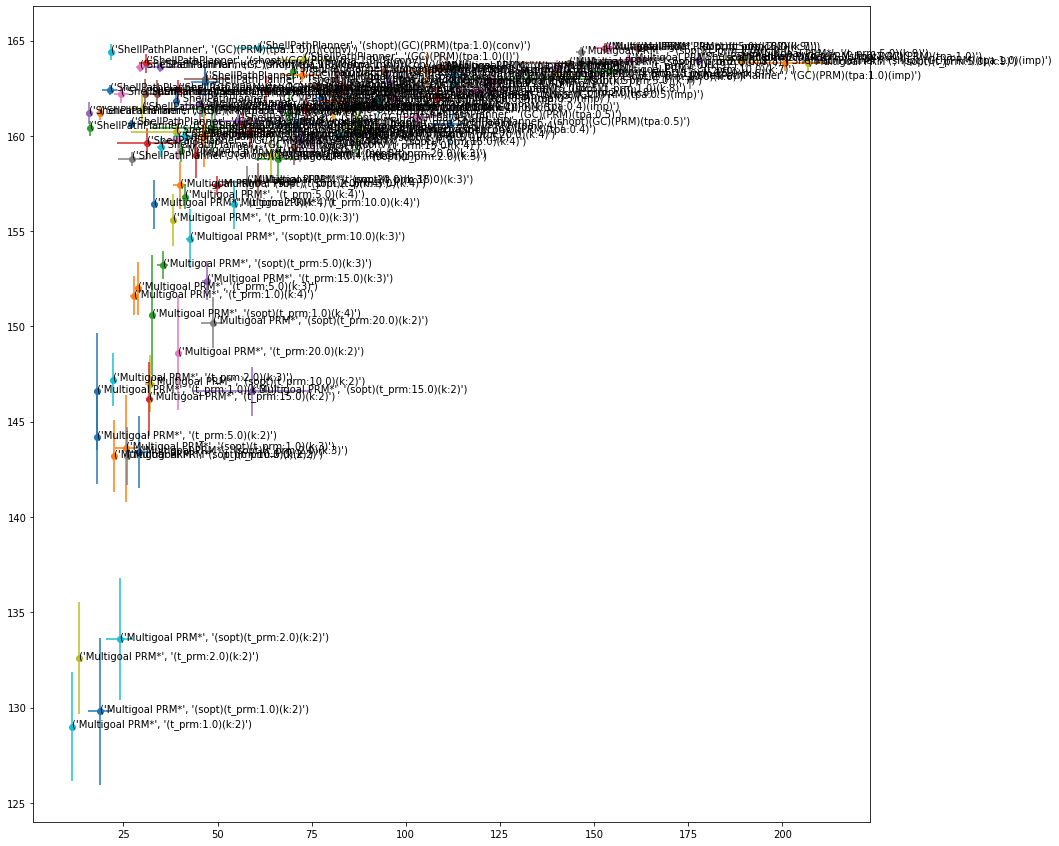

In [6]:
plt.figure(figsize=(15,15))

for index,row in agged.iterrows():
    
    x,xerr=row['run_time']
    y,yerr=row['goals_visited']
    
    plt.scatter(x,y)
    plt.errorbar(x,y,xerr=xerr,yerr=yerr)
    
    plt.annotate(str(index), (x,y))
    

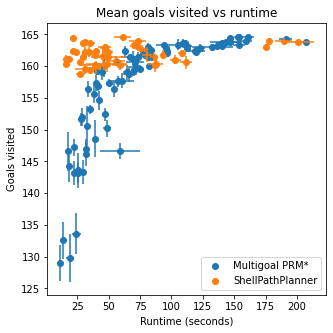

In [7]:
plt.figure(figsize=(5,5))

for planner,data in agged.groupby('planner'):
    x=data['run_time']['mean']
    xerr=data['run_time']['sem']

    y=data['goals_visited']['mean']
    yerr=data['goals_visited']['sem']

    plt.scatter(x,y,label=planner)
    plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='',linestyle='')

plt.title('Mean goals visited vs runtime')
plt.xlabel('Runtime (seconds)')
plt.ylabel('Goals visited')
plt.legend()

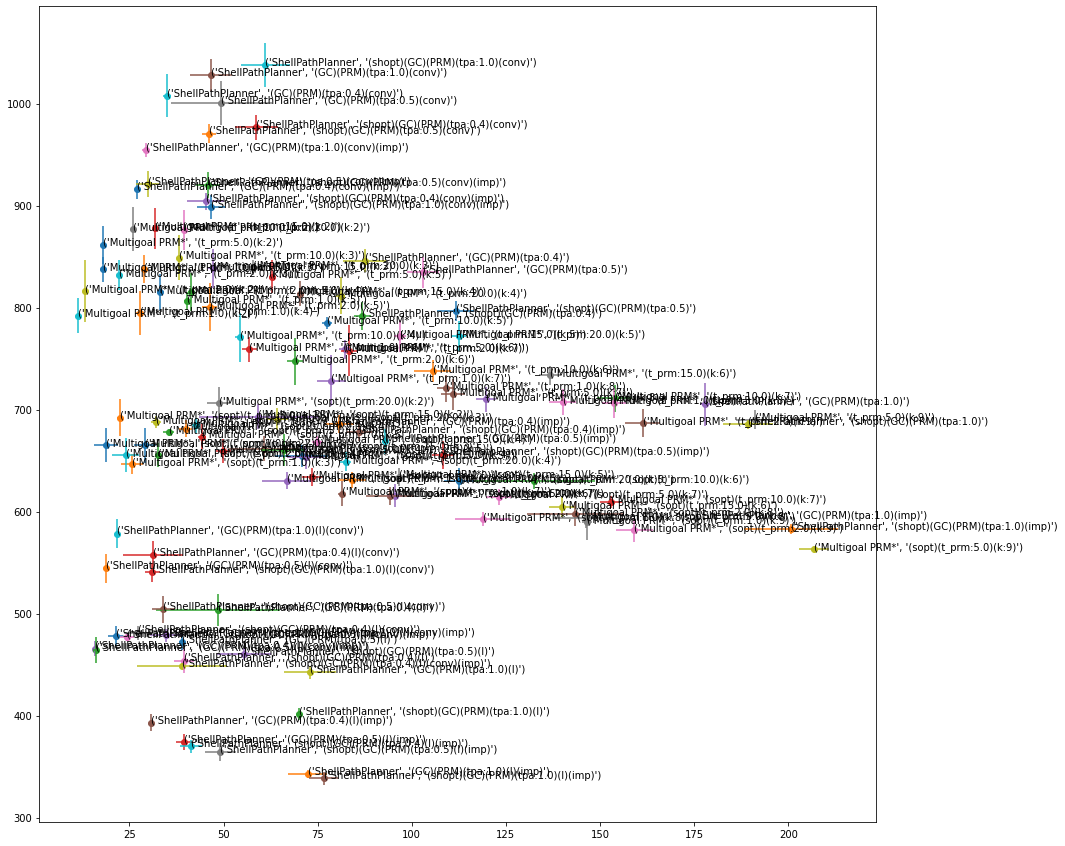

In [8]:
plt.figure(figsize=(15,15))

for index,row in agged.iterrows():
    
    x,xerr=row['run_time']
    y,yerr=row['final_path_length']
    
    plt.scatter(x,y)
    plt.errorbar(x,y,xerr=xerr,yerr=yerr)
    
    plt.annotate(str(index), (x,y))
    

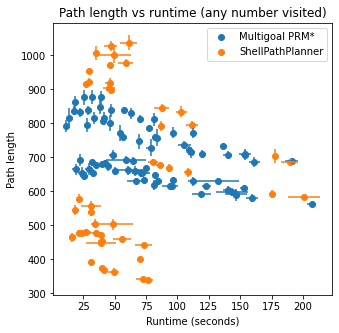

In [9]:
plt.figure(figsize=(5,5))

for planner,data in agged.groupby('planner'):
    x=data['run_time']['mean']
    xerr=data['run_time']['sem']

    y=data['final_path_length']['mean']
    yerr=data['final_path_length']['sem']

    plt.scatter(x,y,label=planner)
    plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='',linestyle='')

plt.title('Path length vs runtime (any number visited)')
plt.xlabel('Runtime (seconds)')
plt.ylabel('Path length')
plt.legend()

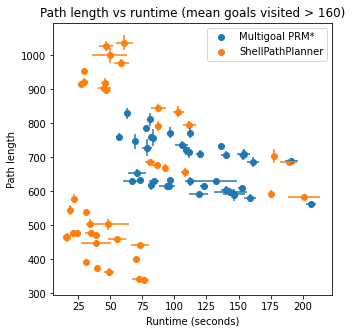

In [10]:
plt.figure(figsize=(5,5))

for planner,data in agged[agged['goals_visited']['mean'] > 160].groupby('planner'):
    x=data['run_time']['mean']
    xerr=data['run_time']['sem']

    y=data['final_path_length']['mean']
    yerr=data['final_path_length']['sem']

    plt.scatter(x,y,label=planner)
    plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='',linestyle='')

plt.title('Path length vs runtime (mean goals visited > 160)')
plt.xlabel('Runtime (seconds)')
plt.ylabel('Path length')
plt.legend()